In [17]:
!pip install -q pandas numpy scikit-learn matplotlib seaborn nltk

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Sample Data: Replace with your own data or upload CSV
data = {
    'text': [
        "I absolutely love this!",
        "Worst experience ever, very bad.",
        "Had a great time using it.",
        "I'm angry and disappointed.",
        "Such a pleasant surprise!",
        "Terrible quality, hate it.",
        "Best product I've tried.",
        "Not satisfied at all.",
        "So happy with this.",
        "It makes me feel awful."
    ],
    'sentiment': [
        'positive', 'negative', 'positive', 'negative', 'positive',
        'negative', 'positive', 'negative', 'positive', 'negative'
    ]
}

df = pd.DataFrame(data)

# 📤 Output 1: Raw Dataset
df


,text,sentiment
0,I absolutely love this!,positive
1,"Worst experience ever, very bad.",negative
2,Had a great time using it.,positive
3,I'm angry and disappointed.,negative
4,Such a pleasant surprise!,positive
5,"Terrible quality, hate it.",negative
6,Best product I've tried.,positive
7,Not satisfied at all.,negative
8,So happy with this.,positive
9,It makes me feel awful.,negative


In [21]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(preprocess_text)

# 📤 Output 2: Cleaned Text
df[['text', 'clean_text']]


,text,clean_text
0,I absolutely love this!,absolutely love
1,"Worst experience ever, very bad.",worst experience ever bad
2,Had a great time using it.,great time using
3,I'm angry and disappointed.,angry disappointed
4,Such a pleasant surprise!,pleasant surprise
5,"Terrible quality, hate it.",terrible quality hate
6,Best product I've tried.,best product tried
7,Not satisfied at all.,satisfied
8,So happy with this.,happy
9,It makes me feel awful.,makes feel awful


In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# 📤 Output 3: Logistic Regression Results
print("🔍 Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))


🔍 Logistic Regression Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 📤 Output 4: Random Forest Results
print("🌲 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


🌲 Random Forest Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


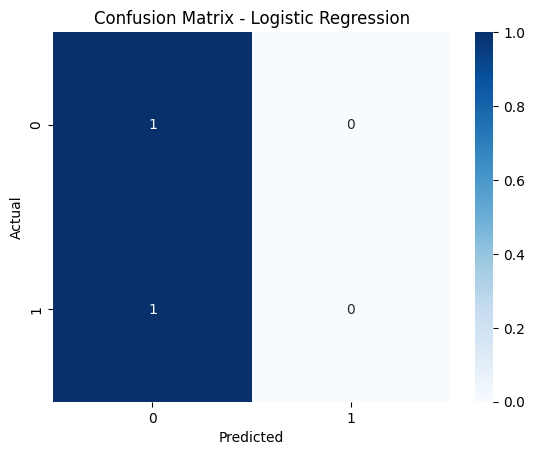

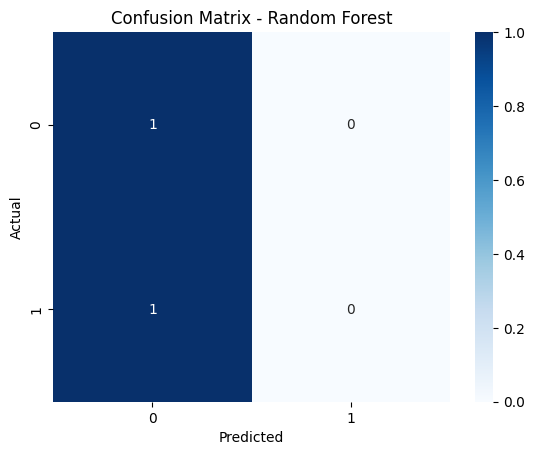

In [26]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📤 Output 5: Confusion Matrices
plot_conf_matrix(y_test, lr_pred, "Confusion Matrix - Logistic Regression")
plot_conf_matrix(y_test, rf_pred, "Confusion Matrix - Random Forest")
